# Apply STFT to the FHR signals

For an explanation of STFT, see `04_introduction_to_signal_transformation.ipynb`.

This notebook applies STFT to the **last 20 minutes** of each of the cleaned FHR signals.

## Set up

In [1]:
from dataclasses import dataclass
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [2]:
# Define file paths
@dataclass(frozen=True)
class Paths:
    '''Singleton object for storing paths to data and database.'''

    data = './data_fhr_clean'
    images = './outputs/spectograms'


paths = Paths()

In [3]:
# Set up dictionary for signals
signals = dict()

# Get list of filenames and loop through them
filenames = os.listdir(paths.data)
for file in filenames:
    # Get filename and file extension
    filename, file_extension = os.path.splitext(os.path.join(paths.data, file))
    # Load data and save to dict with filename (without path/csv) as index
    if file_extension == '.csv':
        filename_short = filename.split('/')[-1]
        signals[filename_short] = pd.read_csv(os.path.join(paths.data, file))['FHR']

## Define STFT function

**Note:** It's been a steep learning curve understanding these transformations, and I'm not absolutely certain that I've used the best parameters here. Chosen parameters were based on exploring different NFFT and overlap in 04_introduction_to_signal_transformation.ipynb.

In [4]:
def fhr_spectogram(record, nfft, noverlap, show=False):
    '''
    Produce spectrogram of last 20 minutes of FHR records, using the
    provided NFFT and overlap, with no axis or labels
    Inputs:
    - record - string, name of record from dictionary of FHR signals
    - nfft - integer, number of data points used in each block
    - noverlap - amount of overlap between blocks
    - show - boolean, if true print figure
    '''
    fig, ax = plt.subplots()
    ax.specgram(
        x=signals[record].tail(20*60*4),
        NFFT=nfft,
        Fs=4,
        detrend='mean',
        window=np.hanning(nfft),
        noverlap=noverlap,
        mode='psd')
    plt.axis('off')
    plt.savefig(f'{paths.images}/{record}.png', bbox_inches='tight', pad_inches=0)
    if show:
        plt.show()
    plt.close(fig)

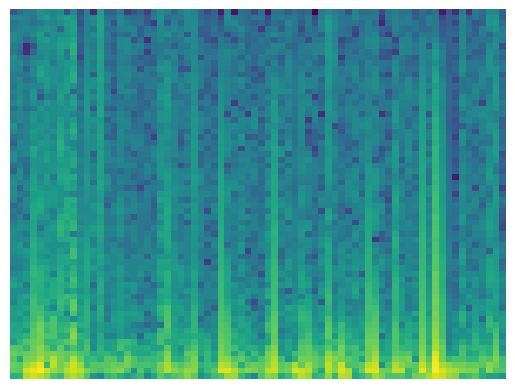

In [5]:
fhr_spectogram(record='1001', nfft=128, noverlap=64, show=True)

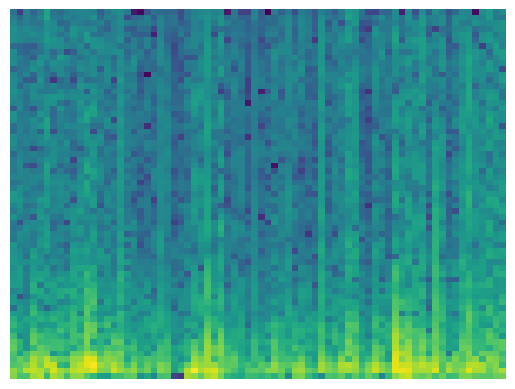

In [6]:
fhr_spectogram(record='1463', nfft=128, noverlap=64, show=True)

## Apply STFT to the signals and save spectograms

In [7]:
for key, value in signals.items():
    fhr_spectogram(record=key, nfft=128, noverlap=64)